# Detailed Data Analysis for Gesture Dataset

 ### 1. Imports and Settings

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
# Enable inline plotting
%matplotlib inline

In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)

### 2. Data overview

In [ ]:

df = pd.read_csv('gestures.csv', header=None)

print(f'Total number of samples: {df.shape[0]}')
print(f'Number of Classes: {len( df[0].unique() )}')
df.head(6)

Total number of samples: 432
Number of Classes: 13


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1.000000,-0.254545,0.745455,-0.854545,0.709091,-0.881818,0.672727,-0.881818,0.572727,-0.918182,0.783317,0.831012,0.054629
1,0,1.000000,-0.301887,0.726415,-0.915094,0.698113,-0.952830,0.698113,-0.962264,0.641509,-0.971698,0.790404,0.844633,0.055525
2,0,0.891892,-0.387387,0.540541,-0.909910,0.522523,-0.936937,0.495495,-0.954955,0.405405,-1.000000,0.807645,0.849308,0.041664
3,0,0.888889,-0.462963,0.509259,-0.962963,0.462963,-0.981481,0.453704,-0.990741,0.398148,-1.000000,0.790258,0.844683,0.062767
4,0,0.903846,-0.461538,0.509615,-0.942308,0.480769,-0.971154,0.461538,-0.990385,0.403846,-1.000000,0.813551,0.866688,0.053380
5,0,1.000000,-0.289720,0.766355,-0.803738,0.728972,-0.813084,0.663551,-0.822430,0.588785,-0.831776,0.684726,0.714741,0.046730


### 3. Assign Column Names

In [ ]:


# First column = label, next 13 columns = features
feature_cols = [f'feat_{i+1}' for i in range(13)]
cols = ['label'] + feature_cols
df.columns = cols

### 4. Map Integer Labels to Gesture Names

In [ ]:

gesture_names = [
    'Cap_Subt', 'Play_Pause', 'fullscreen', 'Vol_up_ytb', 'Vol_up_gen',
    'Vol_down_ytb', 'Vol_down_gen', 'Forward', 'Backward', 'Move_mouse',
    'Left_click', 'Right_click', 'Neutral'
]
df['gesture'] = df['label'].map(lambda x: gesture_names[x])


print("Dataset shape:", df.shape)
df.head()

Dataset shape: (432, 15)


,label,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,gesture
0,0,1.000000,-0.254545,0.745455,-0.854545,0.709091,-0.881818,0.672727,-0.881818,0.572727,-0.918182,0.783317,0.831012,0.054629,Cap_Subt
1,0,1.000000,-0.301887,0.726415,-0.915094,0.698113,-0.952830,0.698113,-0.962264,0.641509,-0.971698,0.790404,0.844633,0.055525,Cap_Subt
2,0,0.891892,-0.387387,0.540541,-0.909910,0.522523,-0.936937,0.495495,-0.954955,0.405405,-1.000000,0.807645,0.849308,0.041664,Cap_Subt
3,0,0.888889,-0.462963,0.509259,-0.962963,0.462963,-0.981481,0.453704,-0.990741,0.398148,-1.000000,0.790258,0.844683,0.062767,Cap_Subt
4,0,0.903846,-0.461538,0.509615,-0.942308,0.480769,-0.971154,0.461538,-0.990385,0.403846,-1.000000,0.813551,0.866688,0.053380,Cap_Subt


### 5. Class Distribution

Backward        31
Cap_Subt        31
Forward         31
Left_click      31
Move_mouse      30
Neutral         63
Play_Pause      30
Right_click     30
Vol_down_gen    35
Vol_down_ytb    30
Vol_up_gen      30
Vol_up_ytb      30
fullscreen      30
Name: gesture, dtype: int64


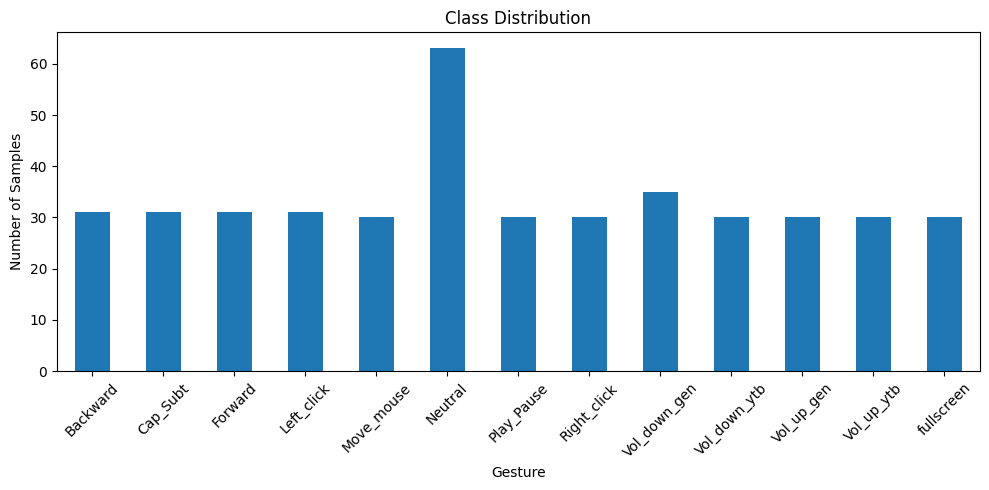

In [27]:

counts = df['gesture'].value_counts().sort_index()

print(counts)
plt.figure(figsize=(10,5))
counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Gesture')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Descriptive Statistics for Features

In [ ]:

stats = df[feature_cols].describe().T
stats['range'] = stats['max'] - stats['min']
stats

,count,mean,std,min,25%,50%,75%,max,range
feat_1,432.0,0.391601,0.484887,-0.817073,0.088386,0.373219,0.869734,1.000000,1.817073
feat_2,432.0,-0.261815,0.560766,-1.000000,-0.591432,-0.442830,-0.034151,1.000000,2.000000
feat_3,432.0,0.391736,0.543016,-1.000000,0.147291,0.380617,0.882695,1.000000,2.000000
feat_4,432.0,-0.460787,0.687541,-1.000000,-0.967366,-0.769102,-0.308714,1.000000,2.000000
feat_5,432.0,0.300943,0.421819,-0.745455,0.031184,0.220470,0.617382,1.000000,1.745455
feat_6,432.0,-0.352545,0.601494,-1.000000,-0.847949,-0.432520,-0.141767,1.000000,2.000000
feat_7,432.0,0.105626,0.299296,-0.862069,-0.058824,0.072770,0.345705,0.823009,1.685078
feat_8,432.0,-0.247315,0.450831,-1.000000,-0.470757,-0.311078,-0.073923,0.874016,1.874016
feat_9,432.0,-0.005729,0.308109,-1.000000,-0.151541,-0.042926,0.214286,0.787500,1.787500
feat_10,432.0,-0.203416,0.433195,-1.000000,-0.433822,-0.266954,0.000000,0.661417,1.661417


### 7. Feature Correlation Heatmap

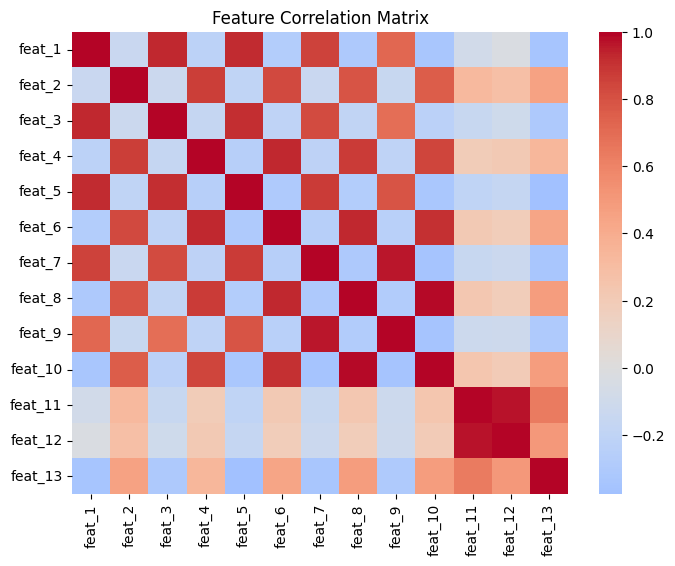

In [ ]:

import seaborn as sns
corr = df[feature_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

### 8. PCA for Dimensionality Reduction

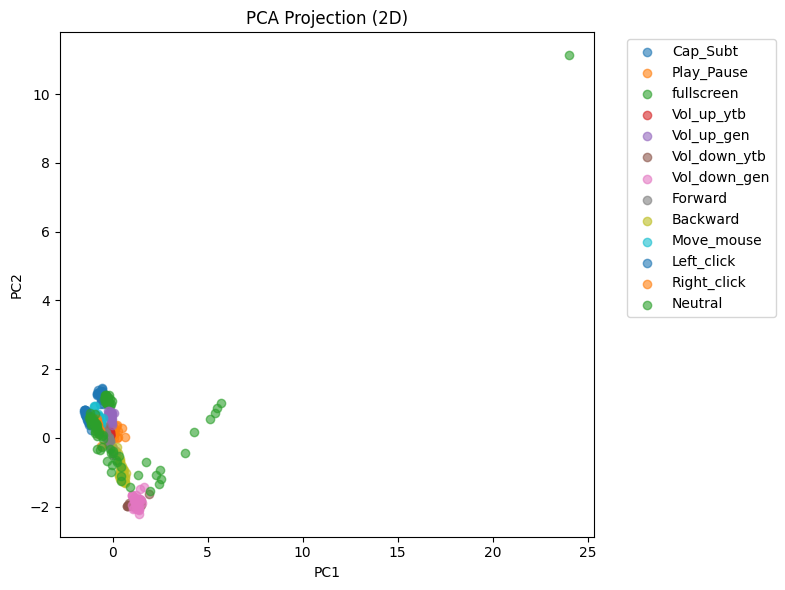

In [ ]:

pca = PCA(n_components=2)
coords = pca.fit_transform(df[feature_cols])
pca_df = pd.DataFrame(coords, columns=['PC1','PC2'])
pca_df['gesture'] = df['gesture']

plt.figure(figsize=(8,6))
for name in gesture_names:
    mask = pca_df['gesture'] == name
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], label=name, alpha=0.6)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### 9. Feature Distributions by Class (Boxplots)

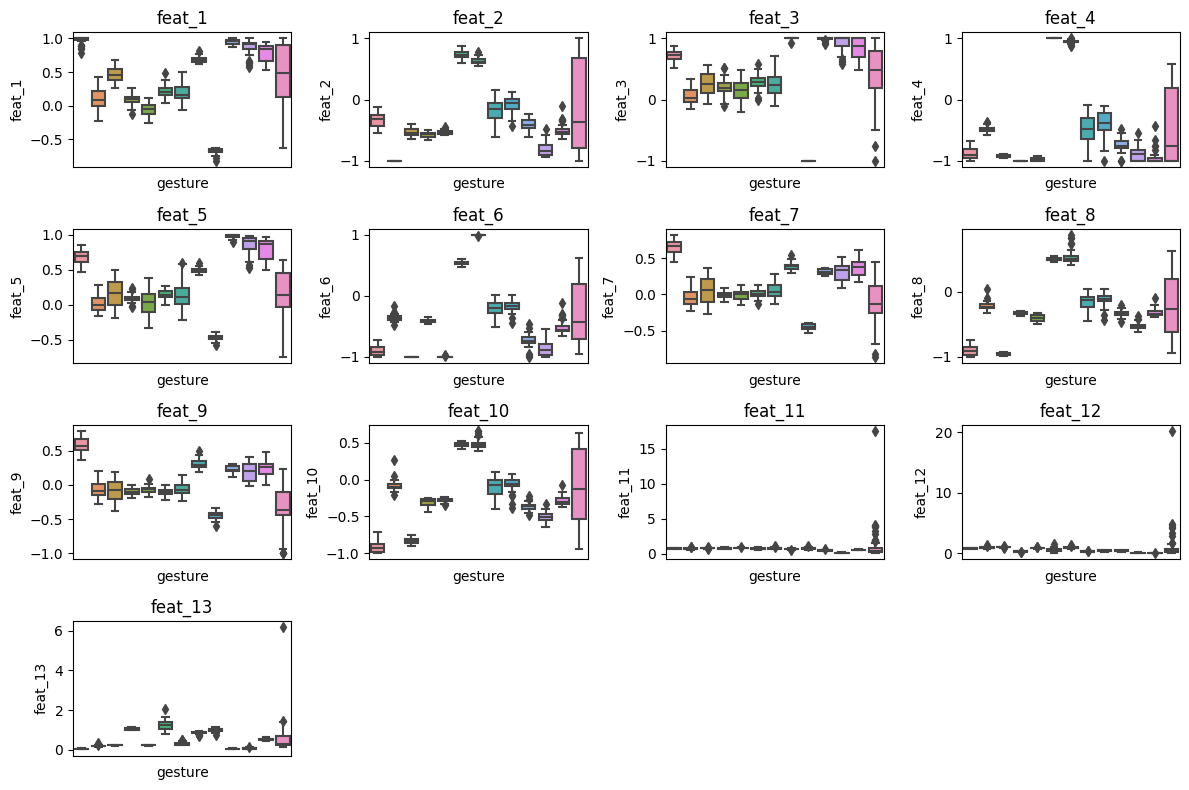

In [ ]:

plt.figure(figsize=(12,8))
for i, feat in enumerate(feature_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(x='gesture', y=feat, data=df)
    plt.xticks([], [])
    plt.title(feat)
plt.tight_layout()
plt.show()